In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('../../..'))

if module_path not in sys.path :
    sys.path.append(module_path)

     
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit


# Panel A

In [2]:
eps = 1e-3
mu = 0.6105653703843762
nu = 1.2091995761561452

ca_dict = {0.01 : ['ca1e-2', 'b'], 0.1 : ['ca1e-1', 'r'], 1 : ['ca1e0', 'purple'],10 : ['ca1e1', 'orange']}
#0 : ['ca0', 'k'], 

# (chis, chiv) : marker, markersize, alpha, linewidth
lw = 1.
ms = 4

chi_dict = {(5, 5) : ['^', ms, 1., lw],
            #(5, 1) : ['^', ms, 1., lw],
            (50, 5) : ['s', ms, 1., lw],
            #(50, 50) : ['+', ms, 1., lw],
            #(50, 1) : ['+', ms, 1., lw],
            #(500, 500) : ['s', ms, 1., lw],
            #(500, 1) : ['s', ms, 1., lw],
            (500, 5) : ['o', ms, 1., lw],
           }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


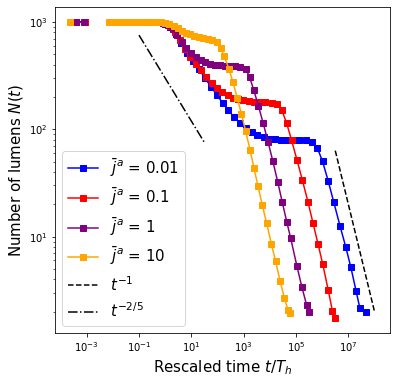

In [5]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.yscale('log')

rescaled = True

tauv, ell0, chiv, L0 = 1., 10., 50., 1.
xiv = np.sqrt(L0* float(chiv)**2 * ell0**3)

for chi in [(50, 5)] :
    
    T_h = (2*tauv*ell0*L0)/((xiv**2)*mu*eps)
    for ca in ca_dict.keys() :
        Nt_avg = np.loadtxt('panelA_data/Nt_chiv50_ja'+str(ca)+'.txt')
        if rescaled :
            plt.plot(Nt_avg[:, 0]/T_h, Nt_avg[:, 1], color = ca_dict[ca][1], marker = 's', label = r'$\bar{j}^a$ = ' + str(ca))
        else :
            plt.plot(Nt_avg[:, 0], Nt_avg[:, 1], color = ca_dict[ca][1], marker = 's', label = r'$\bar{j}^a$ = ' + str(ca))
                

if rescaled :
    kappa1, alpha1 = 200000000., -1
    kappa2, alpha2 = 300., -2./5
    t1 = np.logspace(6.5, 8, 101)
    t2 = np.logspace(-1, 1.5, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(0, 2, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')
plt.legend(loc=3, fontsize=15)

plt.xlabel(r'Rescaled time $t/T_h$', fontsize=15)
plt.ylabel(r'Number of lumens $N(t)$', fontsize=15)

plt.savefig('figure5_panelA.eps', format='eps')

plt.show()

Coarsening of 1-dimensional chains with uniform active pumping $\bar{j}^a$: plot of the number of lumens as function of the rescaled time $t/T_h$ for increasing values of the pumping rate $\bar{j}^a=10^{−2}$,$10^{−1}$,$1$ and $10$. Each curve is the average over 20 simulations with screening lengths $\chi_v=50$,$\chi_s=5$.

# Panel B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


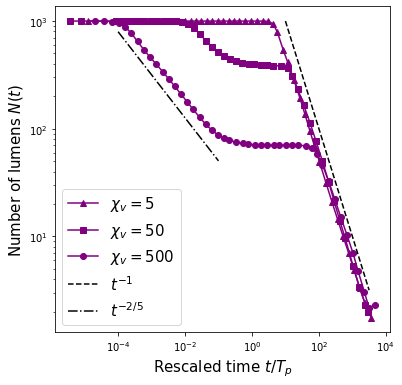

In [12]:
plt.figure(figsize=(6, 6))
plt.xscale('log')
plt.yscale('log')

rescaled = True

for chi in [(5, 5), (50, 5), (500, 5)] :
    Tp = tauv / (mu*nu*ca)
    for ca in [1] :
        Nt_avg = np.loadtxt('panelB_data/Nt_chiv'+str(chi[0])+'_ja'+str(ca)+'.txt')
        if rescaled :
            plt.plot(Nt_avg[:, 0]/Tp, Nt_avg[:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label =  r'$\chi_v = $'+str(chi[0]))
        else :
            plt.plot(Nt_avg[:, 0], Nt_avg[:, 1], color = ca_dict[ca][1], marker = chi_dict[chi][0], label = r'$\chi_v = $'+str(chi[0]))

if rescaled :
    kappa1, alpha1 = 10000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1., 3.5, 101)
    t2 = np.logspace(-4, -1, 101)
else :
    kappa1, alpha1 = 5000., -1
    kappa2, alpha2 = 20., -2./5
    t1 = np.logspace(1, 3, 101)
    t2 = np.logspace(-4, 0, 101)

plt.plot(t1, kappa1*t1**alpha1, color='k', linestyle='--', label = r'$t^{-1}$')
plt.plot(t2, kappa2*t2**alpha2, color='k', linestyle='-.', label = r'$t^{-2/5}$')

plt.xlabel(r'Rescaled time $t/T_p$', fontsize=15)
plt.ylabel(r'Number of lumens $N(t)$', fontsize=15)
plt.legend(loc=3, fontsize=15)

plt.savefig('figure5_panelB.eps', format='eps')
plt.show()



Number of lumens as function of the rescaled time $t/T_p$ for three values of the pressure screening length $\chi_v$, for $\bar{j}^a = 1$ and $\chi_s =5$.

# Panel C

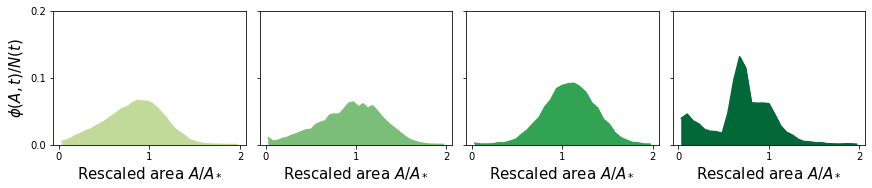

In [13]:
steps = [10, 25, 47, 50]

col_steps = {steps[0] : '#C2DA99', 
             steps[1] : '#7BBE79', 
             steps[2] : '#31A353', 
             steps[3] : '#026838', 
            }

fig, ax = plt.subplots(1, 4, figsize = (12, 2.5), constrained_layout=True, sharey=True)

s = 10
distrib = np.loadtxt('panelC_data/Nt_avg_chiv500_chis5_ca1e0_step'+str(s)+'area.txt')
ax[0].plot(distrib[0]/np.average(distrib[0]), distrib[1], color = col_steps[s])
ax[0].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
ax[0].locator_params(tight=True, nbins=3)
ax[0].set_ylim(0., 0.2)
ax[0].set_xlabel('Rescaled area $A/A_*$', fontsize=15)

s = 25
distrib = np.loadtxt('panelC_data/Nt_avg_chiv500_chis5_ca1e0_step'+str(s)+'area.txt')
ax[1].plot(distrib[0]/np.average(distrib[0]), distrib[1], color = col_steps[s])
ax[1].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
ax[1].locator_params(tight=True, nbins=3)
ax[1].set_ylim(0., 0.2)
ax[1].set_xlabel('Rescaled area $A/A_*$', fontsize=15)

s = 47
distrib = np.loadtxt('panelC_data/Nt_avg_chiv500_chis5_ca1e0_step'+str(s)+'area.txt')
ax[2].plot(distrib[0]/np.average(distrib[0]), distrib[1], color = col_steps[s])
ax[2].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
ax[2].locator_params(tight=True, nbins=3)
ax[2].set_ylim(0., 0.2)
ax[2].set_xlabel('Rescaled area $A/A_*$', fontsize=15)

s = 50
distrib = np.loadtxt('panelC_data/Nt_avg_chiv500_chis5_ca1e0_step'+str(s)+'area.txt')
ax[3].plot(distrib[0]/np.average(distrib[0]), distrib[1], color = col_steps[s])
ax[3].fill_between(distrib[0]/np.average(distrib[0]), 0., distrib[1], color=col_steps[s])
ax[3].locator_params(tight=True, nbins=3)
ax[3].set_ylim(0., 0.2)
ax[3].set_xlabel('Rescaled area $A/A_*$', fontsize=15)

ax[0].set_ylabel(r'$\phi(A,t)/N(t)$', fontsize=15)

plt.savefig('figure5_panelC.eps', format='eps')
plt.show()

Area distribution $\phi(A,t)$ at four different times, with 100 simulations averaged.